In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('data/Bank Customer Churn Prediction.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [3]:
df['churn'].value_counts() /len(df)

churn
0    0.7963
1    0.2037
Name: count, dtype: float64

In [4]:
df_obj = df.select_dtypes(exclude=np.number)
df_obj.describe()

,country,gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [5]:
df_obj.head(10)

,country,gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
5,Spain,Male
6,France,Male
7,Germany,Female
8,France,Male
9,France,Male


In [6]:
df = pd.get_dummies(df, columns=['country'])

In [7]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   gender            10000 non-null  int64  
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
 11  country_France    10000 non-null  bool   
 12  country_Germany   10000 non-null  bool   
 13  country_Spain     10000 non-null  bool   
dtypes: bool(3), float64(2), int64(9)
memory usage: 888.8 KB


In [9]:
df.columns

Index(['customer_id', 'credit_score', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn', 'country_France', 'country_Germany', 'country_Spain'],
      dtype='object')

In [10]:
features = ['credit_score', 'age', 'tenure', 'balance',
    'products_number', 'estimated_salary',
    ]
target = 'churn'

In [11]:
from sklearn.model_selection import train_test_split

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from utils import base_model, feature_importance

model = base_model(X_train, y_train)

Accuracy: 0.8438
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1273
           1       0.71      0.40      0.51       327

    accuracy                           0.84      1600
   macro avg       0.79      0.68      0.71      1600
weighted avg       0.83      0.84      0.83      1600



In [13]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(report)

Accuracy: 0.8395
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1607
           1       0.65      0.39      0.49       393

    accuracy                           0.84      2000
   macro avg       0.76      0.67      0.70      2000
weighted avg       0.82      0.84      0.82      2000



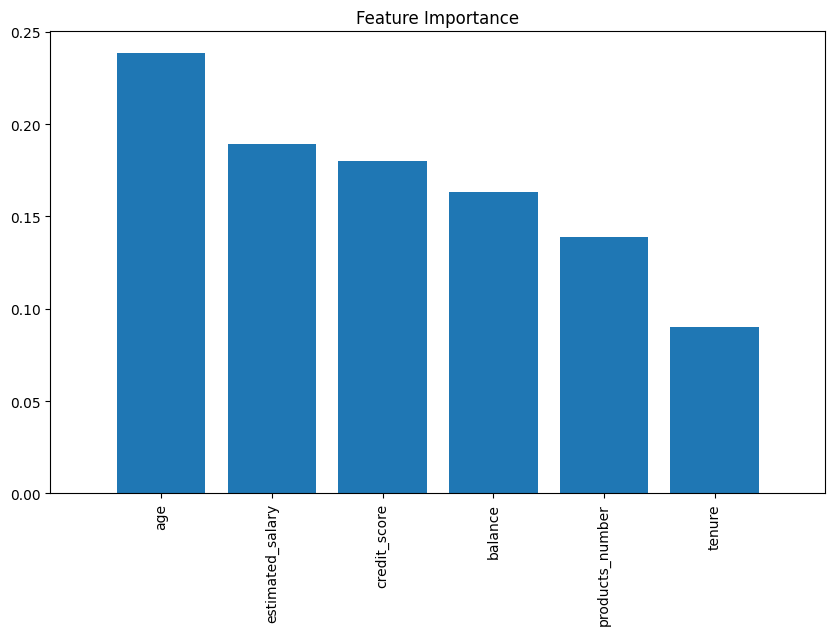

In [14]:
feature_importance(model, X_train)